author : sybyeon1102@gmail.com

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from matplotlib import rc
rc('font', family='Malgun Gothic') # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호출력 설정
plt.rc('font', size=16)

# 비만여부 - 당뇨+전단계 비율 plot

In [3]:
fat = pd.read_pickle('./fat_edu_gluCAT.pkl')

In [4]:
slim = pd.read_pickle('./slim_edu_gluCAT.pkl')

In [5]:
fat_glucat = fat.edu_0 + fat.edu_1

In [6]:
slim_glucat = slim.edu_0 + slim.edu_1

In [7]:
total_glucat = fat_glucat + slim_glucat

In [8]:
fat_glucat/fat_glucat.sum()

0    0.497921
1    0.472104
2    0.029975
dtype: float64

In [9]:
slim_glucat/slim_glucat.sum()

0    0.591924
1    0.398529
2    0.009547
dtype: float64

In [10]:
total_glucat[1:].sum()/total_glucat.sum()

0.441796713923139

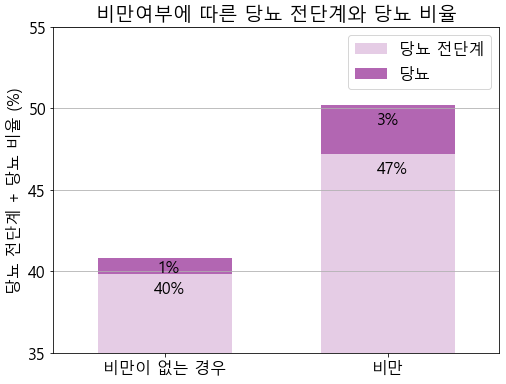

In [70]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

alpha = 0.5

r1 = ax.bar(['비만이 없는 경우', '비만'], [39.85, 47.21], width=0.6, 
            label='당뇨 전단계', color='purple', alpha=0.2)
r2 = ax.bar(['비만이 없는 경우', '비만'], [0.95, 2.99], width=0.6, 
            bottom=[39.85, 47.21], label='당뇨', color='purple', alpha=0.6)
ax.set_ylabel('당뇨 전단계 + 당뇨 비율 (%)')
ax.set_ylim(35, 55)
ax.set_xlim(-0.5, 1.5)
ax.set_yticks(range(35, 55+1, 5))
ax.legend()
ax.set_title('비만여부에 따른 당뇨 전단계와 당뇨 비율')

# ax.bar_label(r1, padding=3, label_type='edge')

ax.text(0-0.05, 39.85-1.2, '40%')
ax.text(1-0.05, 47.21-1.2, '47%')
ax.text(0-0.03, 39.85+0.95-0.85, '1%')
ax.text(1-0.05, 47.21+2.99-1.2, '3%')

ax.grid(axis='y')

# fig.savefig('./plotimages/01비만여부에 따른 당뇨 전단계와 당뇨 비율.png')

plt.show()

# 교육 - 당뇨

In [93]:
df1 = pd.read_pickle('./edu_glucat_count.pkl')
df1

,0,1,2,3
0,105000,109000,258000,7700
1,89000,84000,188000,4700
2,4800,3500,6000,150


In [94]:
edu_sum = [df1[i].sum() for i in range(4)]

In [95]:
(df1[0]/df1[0].sum())[1], (df1[0]/df1[0].sum())[2]

(0.4476861167002012, 0.02414486921529175)

In [96]:
li_glucat1, li_glucat2 = [], []

In [97]:
for i in range(4):
    li_glucat1.append((df1[i]/df1[i].sum())[1]*100)
    li_glucat2.append((df1[i]/df1[i].sum())[2]*100)

In [98]:
np.array(li_glucat1) + np.array(li_glucat2)

array([47.18309859, 44.52926209, 42.92035398, 38.64541833])

In [99]:
47.18-42.92

4.259999999999998

In [100]:
edu = ['고등학교', '전문대학', '4년제대학', '5년제이상']

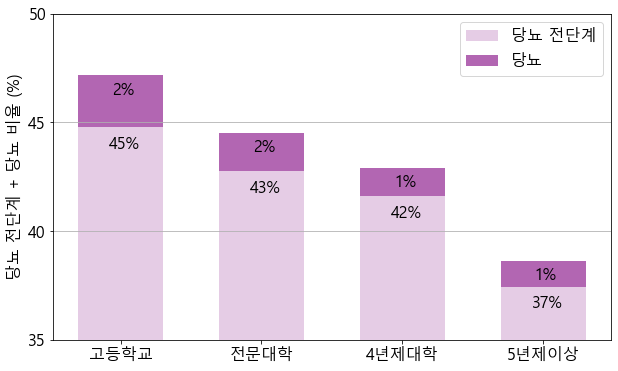

In [101]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.bar(edu, li_glucat1, label='당뇨 전단계', color='purple', alpha=0.2, width=0.6)
ax.bar(edu, li_glucat2, bottom=li_glucat1, label='당뇨', color='purple', alpha=0.6, width=0.6)
ax.set_ylabel('당뇨 전단계 + 당뇨 비율 (%)')
ax.set_ylim(35, 50)
ax.set_yticks(range(35, 50+1, 5))
ax.grid(axis='y')
ax.legend()

# fig.savefig('./plotimages/학력별 당뇨전단계 당뇨 비율.png')

for i, gs in enumerate(zip(li_glucat1, li_glucat2)):
    g1, g2 = gs
    ax.text(i-0.08, g1-1, f'{g1:.0f}%')
    ax.text(i-0.06, g1+g2-0.9, f'{g2:.0f}%')
plt.show()

In [77]:
df1

,0,1,2,3
0,105000,109000,258000,7700
1,89000,84000,188000,4700
2,4800,3500,6000,150


In [78]:
df1[0] = df1[0]+df1[1]

In [79]:
df1.drop(columns=1, inplace=True)

In [80]:
df1[1] = df1[2] + df1[3]

In [81]:
df1.drop(columns=[2, 3], inplace=True)

In [82]:
df1[0] = df1[0]/df1[0].sum()

In [83]:
df1[1] = df1[1]/df1[1].sum()

In [84]:
df1 = df1.applymap(lambda x: 100*x)

In [85]:
df1.iloc[1, :]

0    43.764230
1    41.481003
Name: 1, dtype: float64

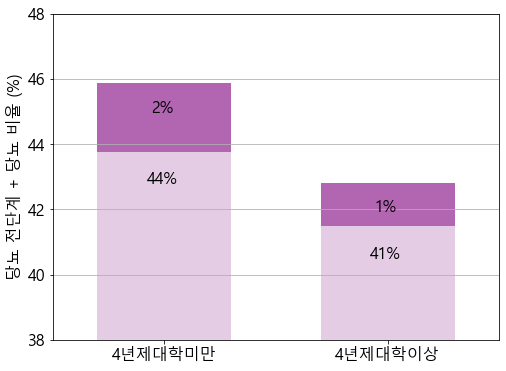

In [91]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
edu = ['4년제대학미만', '4년제대학이상']
ax.bar(edu, df1.iloc[1, :], label='당뇨 전단계', color='purple', alpha=0.2, width=0.6)
ax.bar(edu, df1.iloc[2, :], bottom=df1.iloc[1, :], label='당뇨', color='purple', alpha=0.6, width=0.6)
ax.set_ylabel('당뇨 전단계 + 당뇨 비율 (%)')
ax.set_ylim(38, 48)
# ax.set_yticks(range(34, 50+1, 2))
ax.grid(axis='y')
ax.set_xlim(-0.5, 1.5)

for i, gs in enumerate(zip(df1.iloc[1, :],df1.iloc[2, :])):
    g1, g2 = gs
    ax.text(i-0.08, g1-1, f'{g1:.0f}%')
    ax.text(i-0.06, g1+g2-0.9, f'{g2:.0f}%')
# fig.savefig('./plotimages/4년제 대학 기준 당뇨전단계 당뇨 비율.png')

plt.show()

# 지역별 혈당

In [155]:
df2 = pd.read_csv('./region_dbstat_count.csv')

In [156]:
df2['서울'] = df2['서울1검사장'] + df2['서울2검사장']

In [157]:
df2.drop(columns=['서울1검사장', '서울2검사장'], inplace=True)

In [158]:
df2

,강원(춘천),강원영동(강릉),경기북부,경남,광주.전남,대구.경북,대전.충남,부산,수원,인천,전북,제주,충북,서울
0,10779,6414,43664,25602,39701,44638,36483,43698,56821,50346,15813,5585,12953,111236
1,6701,3949,30199,22590,25409,35840,34499,34962,31871,34829,12997,5396,12073,51329
2,261,153,1426,1146,724,1475,1497,1212,1902,1809,247,234,429,2013


In [159]:
df2.columns

Index(['강원(춘천)', '강원영동(강릉)', '경기북부', '경남', '광주.전남', '대구.경북', '대전.충남', '부산',
       '수원', '인천', '전북', '제주', '충북', '서울'],
      dtype='object')

In [163]:
df3 = df2.copy()

In [165]:
col = '강원(춘천)'

In [167]:
for col in df2.columns:
    df3[col] = (df2[col]/df2[col].sum()*100).round(2)

In [191]:
df3 = df3.transpose()

In [193]:
df3 = df3.sort_values(0)

In [220]:
df3.drop(columns=0, inplace=True)

In [222]:
df3[3] = df3[1]+df3[2]

In [228]:
df3 = df3.sort_values(3)

In [238]:
255-((df3[3].round()-30)*10)

서울          235.0
수원          185.0
강원영동(강릉)    165.0
강원(춘천)      165.0
광주.전남       155.0
경기북부        135.0
인천          135.0
부산          105.0
대구.경북        95.0
전북           95.0
경남           75.0
충북           65.0
대전.충남        55.0
제주           55.0
Name: 3, dtype: float64

# 지역별 혈당 평균

In [4]:
means = pd.read_csv('./region_glucose_mean_median.csv').drop(index=1, columns='통계치')

In [5]:
means

,강원(춘천),강원영동(강릉),경기북부,경남,광주.전남,대구.경북,대전.충남,부산,서울,수원,인천,전북,제주,충북
0,98.24,97.92,98.97,101.18,102.57,99.71,100.8,99.36,96.58,97.92,99.11,101.13,100.93,100.85


In [6]:
means = means.transpose()

In [7]:
means.sort_values(0)

,0
서울,96.58
강원영동(강릉),97.92
수원,97.92
강원(춘천),98.24
경기북부,98.97
인천,99.11
부산,99.36
대구.경북,99.71
대전.충남,100.80
충북,100.85


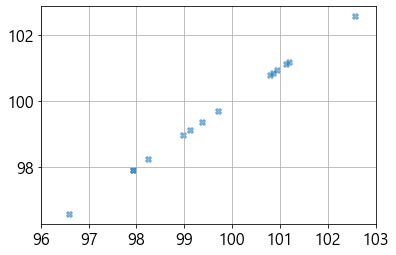

In [15]:
plt.scatter(means.sort_values(0).values, means.sort_values(0).values, marker='X', alpha=0.5)
plt.xticks(range(96, 104))
plt.grid()

In [8]:
250 - ((means.sort_values(0).round(0)[0]-95)*20)

서울          210.0
강원영동(강릉)    190.0
수원          190.0
강원(춘천)      190.0
경기북부        170.0
인천          170.0
부산          170.0
대구.경북       150.0
대전.충남       130.0
충북          130.0
제주          130.0
전북          130.0
경남          130.0
광주.전남        90.0
Name: 0, dtype: float64

In [26]:
means.sort_values(0).round(0)[0]

서울           97.0
강원영동(강릉)     98.0
수원           98.0
강원(춘천)       98.0
경기북부         99.0
인천           99.0
부산           99.0
대구.경북       100.0
대전.충남       101.0
충북          101.0
제주          101.0
전북          101.0
경남          101.0
광주.전남       103.0
Name: 0, dtype: float64